Proyecto Individual No. 2 - Machine Learning

Janice Rico

Aplicación de un Modelo de Machine Learning para predecir si el precio de una propiedad inmobiliaria es Bajo o no.

In [1]:
# Se importan las librerías a utilizar para la carga, el procesamiento y la representación gráfica de los datos

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Se ingestan las bases de datos de train y test, en Dataframes

df_train = pd.read_parquet('./Datasets/train.parquet')
df_test = pd.read_parquet('./Datasets/test.parquet')

In [21]:
# Se da una primera mirada a los datos en la tabla de train
df_train.head(3)

,id,url,region,region_url,price,type,sqfeet,beds,baths,cats_allowed,...,wheelchair_access,electric_vehicle_charge,comes_furnished,laundry_options,parking_options,image_url,description,lat,long,state
0,7048013474,https://boise.craigslist.org/apa/d/very-nice-b...,boise,https://boise.craigslist.org,1350,house,1200,2,2.0,1,...,0,0,0,w/d in unit,detached garage,https://images.craigslist.org/00B0B_cPiJMEheZe...,Super cute row house in the Boise bench area. ...,43.5851,-116.2250,id
1,7043931179,https://cosprings.craigslist.org/apa/d/colorad...,colorado springs,https://cosprings.craigslist.org,1115,apartment,694,1,1.0,1,...,0,0,0,w/d in unit,carport,https://images.craigslist.org/00R0R_5XAoSKvfrz...,Windtree Apartment Homes currently has a spaci...,38.9137,-104.7800,co
2,7048254516,https://norfolk.craigslist.org/apa/d/virginia-...,norfolk / hampton roads,https://norfolk.craigslist.org,1129,apartment,900,2,2.0,0,...,0,0,0,w/d hookups,off-street parking,https://images.craigslist.org/00f0f_3ZbTFrsHpZ...,Call Today! show contact info Indian Lakes ...,36.7922,-76.1643,va


In [22]:
# Se revisan más detalladamente los registros y columnas en la tabla train
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 346479 entries, 0 to 346478
Data columns (total 22 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   id                       346479 non-null  int64  
 1   url                      346479 non-null  object 
 2   region                   346479 non-null  object 
 3   region_url               346479 non-null  object 
 4   price                    346479 non-null  int64  
 5   type                     346479 non-null  object 
 6   sqfeet                   346479 non-null  int64  
 7   beds                     346479 non-null  int64  
 8   baths                    346479 non-null  float64
 9   cats_allowed             346479 non-null  int64  
 10  dogs_allowed             346479 non-null  int64  
 11  smoking_allowed          346479 non-null  int64  
 12  wheelchair_access        346479 non-null  int64  
 13  electric_vehicle_charge  346479 non-null  int64  
 14  come

In [23]:
# Se da una primera mirada a los datos en la tabla de test
df_test.head(3)

,id,url,region,region_url,type,sqfeet,beds,baths,cats_allowed,dogs_allowed,...,wheelchair_access,electric_vehicle_charge,comes_furnished,laundry_options,parking_options,image_url,description,lat,long,state
0,7037609789,https://annarbor.craigslist.org/apa/d/wixom-ho...,ann arbor,https://annarbor.craigslist.org,manufactured,1344,3,2.0,0,0,...,0,0,0,w/d in unit,off-street parking,https://images.craigslist.org/00M0M_iNczP1nzIL...,"OPEN HOUSE TODAY! APPLY THIS WEEK, PUT A HOLDI...",42.5333,-83.5763,mi
1,7032406876,https://vermont.craigslist.org/apa/d/randolph-...,vermont,https://vermont.craigslist.org,apartment,1050,2,1.0,0,0,...,0,0,0,w/d hookups,off-street parking,https://images.craigslist.org/00L0L_ecirmYBIzL...,"Think of it, you'll be first to get your mail....",43.9393,-72.5538,vt
2,7037022682,https://annarbor.craigslist.org/apa/d/ann-arbo...,ann arbor,https://annarbor.craigslist.org,apartment,1150,2,2.0,1,1,...,1,0,0,w/d in unit,carport,https://images.craigslist.org/00e0e_dPln2xjo9g...,One of Ann Arbor's most luxurious apartment co...,42.2492,-83.7712,mi


In [24]:
# Se revisan más detalladamente los registros y columnas en la tabla test
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38498 entries, 0 to 38497
Data columns (total 21 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       38498 non-null  int64  
 1   url                      38498 non-null  object 
 2   region                   38498 non-null  object 
 3   region_url               38498 non-null  object 
 4   type                     38498 non-null  object 
 5   sqfeet                   38498 non-null  int64  
 6   beds                     38498 non-null  int64  
 7   baths                    38498 non-null  float64
 8   cats_allowed             38498 non-null  int64  
 9   dogs_allowed             38498 non-null  int64  
 10  smoking_allowed          38498 non-null  int64  
 11  wheelchair_access        38498 non-null  int64  
 12  electric_vehicle_charge  38498 non-null  int64  
 13  comes_furnished          38498 non-null  int64  
 14  laundry_options       

In [3]:
# Como son muchas columnas, se eliminan las que se consideran menos relevantes,
# tanto en el df_train como en df_test

df_train = df_train.drop(['id','url','region_url','cats_allowed','dogs_allowed','smoking_allowed','wheelchair_access','electric_vehicle_charge','comes_furnished','laundry_options','parking_options','image_url','description'], axis=1)
df_test = df_test.drop(['id','url','region_url','cats_allowed','dogs_allowed','smoking_allowed','wheelchair_access','electric_vehicle_charge','comes_furnished','laundry_options','parking_options','image_url','description'], axis=1)

In [26]:
# Así quedaron los Dataframes

print (df_train.head(3))
print (df_test.head(3))

                    region  price       type  sqfeet  beds  baths      lat  \
0                    boise   1350      house    1200     2    2.0  43.5851   
1         colorado springs   1115  apartment     694     1    1.0  38.9137   
2  norfolk / hampton roads   1129  apartment     900     2    2.0  36.7922   

       long state  
0 -116.2250    id  
1 -104.7800    co  
2  -76.1643    va  
      region          type  sqfeet  beds  baths      lat     long state
0  ann arbor  manufactured    1344     3    2.0  42.5333 -83.5763    mi
1    vermont     apartment    1050     2    1.0  43.9393 -72.5538    vt
2  ann arbor     apartment    1150     2    2.0  42.2492 -83.7712    mi


In [4]:
# Definición de una función que condicione lo que luego irá en la nueva columna "category_price"

def categorizar (fila):
    if fila ['price'] <= 999:
        val = 'low'
    elif fila ['price'] <= 1999:
        val = 'medium'
    else:
        val = 'high'
    return val

In [5]:
# Creación de la columna 'category_price', de acuerdo a la clasificación de 'price' 

df_train ['category_price'] = df_train.apply (categorizar, axis = 1)

In [29]:
# Consultando que la nueva columna 'category_price' se llenó correctamente

df_train [['price', 'category_price']]

,price,category_price
0,1350,medium
1,1115,medium
2,1129,medium
3,1580,medium
4,995,low
...,...,...
346474,672,low
346475,2122,high
346476,1014,medium
346477,935,low


In [6]:
# Función para llevar a la columna "category_price" a 2 opciones: 1 SÍ es Low, 0 NO es Low

def categorizar_low (fila):
    if fila ['category_price'] == 'low':
        val = 1
    else:
        val = 0
    return val

In [7]:
# Creación de la columna "is_low", con sus valores binarios

df_train ['is_low'] = df_train.apply (categorizar_low, axis = 1)

In [34]:
# Se revisa que se creó y llenó correctamente la columna "is_low"

df_train [['category_price', 'is_low']]

,category_price,is_low
0,medium,0
1,medium,0
2,medium,0
3,medium,0
4,low,1
...,...,...
346474,low,1
346475,high,0
346476,medium,0
346477,low,1


In [8]:
# Se eliminan las columnas "price" y "category_price" porque ya no serán útiles para el modelo a entrenar

df_train = df_train.drop(['price', 'category_price'], axis=1)

In [37]:
# Así está quedando "df_train"

df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 346479 entries, 0 to 346478
Data columns (total 9 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   region  346479 non-null  object 
 1   type    346479 non-null  object 
 2   sqfeet  346479 non-null  int64  
 3   beds    346479 non-null  int64  
 4   baths   346479 non-null  float64
 5   lat     344757 non-null  float64
 6   long    344757 non-null  float64
 7   state   346479 non-null  object 
 8   is_low  346479 non-null  int64  
dtypes: float64(3), int64(3), object(3)
memory usage: 23.8+ MB


In [9]:
# Se le aplica Encoding a las columnas que no son numéricas

le = preprocessing.LabelEncoder()

df_train['region'] = le.fit_transform(df_train['region'])
df_train['type'] = le.fit_transform(df_train['type'])
df_train['state'] = le.fit_transform(df_train['state'])

df_test['region'] = le.fit_transform(df_test['region'])
df_test['type'] = le.fit_transform(df_test['type'])
df_test['state'] = le.fit_transform(df_test['state'])

In [40]:
df_train.head(3)

,region,type,sqfeet,beds,baths,lat,long,state,is_low
0,33,6,1200,2,2.0,43.5851,-116.2250,13,0
1,64,0,694,1,1.0,38.9137,-104.7800,5,0
2,236,0,900,2,2.0,36.7922,-76.1643,45,0


In [60]:
df_test.head(3)

,region,type,sqfeet,beds,baths,lat,long,state
0,9,8,1344,3,2.0,42.5333,-83.5763,22
1,370,0,1050,2,1.0,43.9393,-72.5538,46
2,9,0,1150,2,2.0,42.2492,-83.7712,22


In [10]:
# Se genera una variable con la correlación de todas las columnas del Dataframe

corr = df_train.corr()

In [11]:
# Función para graficar la correlación en un mapa de calor

def plot_corre_heatmap(corr):
    plt.figure(figsize=(12,10))
    sns.heatmap(corr, cbar = True,  square = False, annot=True, fmt= '.2f'
                ,annot_kws={'size': 15},cmap= 'coolwarm')
    plt.xticks(rotation = 45)
    plt.yticks(rotation = 45)
    
    b, t = plt.ylim()
    b += 0.5
    t -= 0.5
    plt.ylim(b, t)
    plt.show()

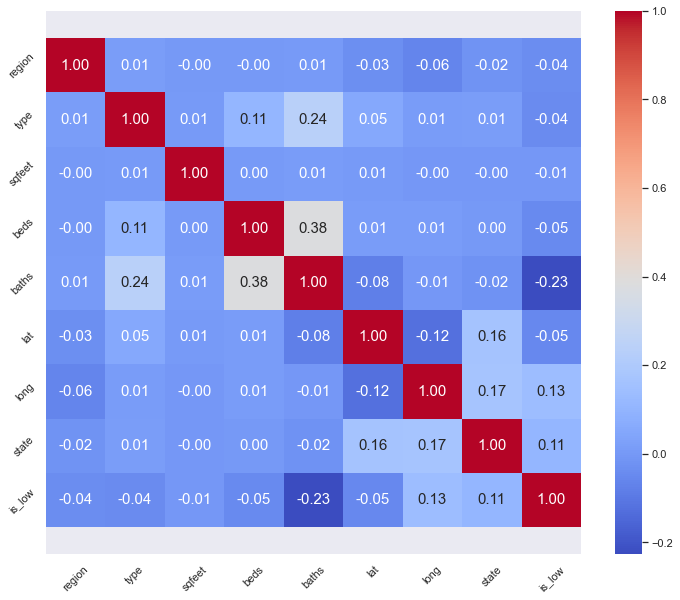

In [12]:
# Llamado de la función para graficar

plot_corre_heatmap(corr)

In [13]:
# Se importa esta librería para ubicar las coordenadas de las propiedades en un mapa

import geopandas

In [12]:
# Se eliminan los valores nulos de la tabla

df_train = df_train.dropna()

In [47]:
# Se genera un dataframe ("df_location") para graficar la latitud y la longitud

df_location = df_train[['lat','long']]

In [48]:
# Se crea una variable ("gdf") para localizar las coordenadas en el mapa

gdf = geopandas.GeoDataFrame(df_location, geometry=geopandas.points_from_xy(df_location.long, df_location.lat))

In [50]:
# Así luce "df_location"

df_location

,lat,long,geometry
0,43.5851,-116.2250,POINT (-116.22500 43.58510)
1,38.9137,-104.7800,POINT (-104.78000 38.91370)
2,36.7922,-76.1643,POINT (-76.16430 36.79220)
3,33.5623,-112.0560,POINT (-112.05600 33.56230)
4,36.0595,-86.6592,POINT (-86.65920 36.05950)
...,...,...,...
346474,37.9591,-87.5293,POINT (-87.52930 37.95910)
346475,32.6279,-117.0370,POINT (-117.03700 32.62790)
346476,33.9659,-80.9355,POINT (-80.93550 33.96590)
346477,48.1995,-101.2800,POINT (-101.28000 48.19950)


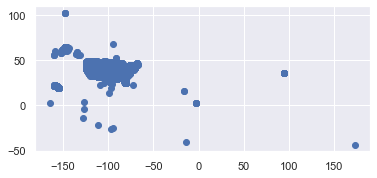

In [51]:
# Se grafica el "GeoDataFrame"

gdf.plot()

plt.show()

In [13]:
# Ya que las columnas de Latitud y Longitud presentan Outliers muy notables, decido eliminarlas del dataframe
# que se usará para aplicar el modelo

df_train = df_train.drop(['lat','long'], axis=1)
df_test = df_test.drop(['lat','long'], axis=1)

In [63]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 344757 entries, 0 to 346478
Data columns (total 7 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   region  344757 non-null  int64  
 1   type    344757 non-null  int64  
 2   sqfeet  344757 non-null  int64  
 3   beds    344757 non-null  int64  
 4   baths   344757 non-null  float64
 5   state   344757 non-null  int64  
 6   is_low  344757 non-null  int64  
dtypes: float64(1), int64(6)
memory usage: 21.0 MB


In [64]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38498 entries, 0 to 38497
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   region  38498 non-null  int32  
 1   type    38498 non-null  int32  
 2   sqfeet  38498 non-null  int64  
 3   beds    38498 non-null  int64  
 4   baths   38498 non-null  float64
 5   state   38498 non-null  int32  
dtypes: float64(1), int32(3), int64(2)
memory usage: 1.3 MB


In [14]:
# Se definen "X" y "y" para la aplicación del modelo

X = df_train[['region','type','sqfeet','beds','baths','state']]
y = df_train[['is_low']]

In [15]:
# Se separan los datos de entrenamiento y prueba

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state=0)

In [16]:
# Se escogió aplicar el modelo de Regresión Logística, por su alta efectividad en problemas de clasificación

from sklearn.linear_model import LogisticRegression

# Creación del modelo

model_LogReg = LogisticRegression(solver='lbfgs', max_iter=10000)

In [17]:
# Entrenamiento del modelo

model_LogReg.fit(X_train, y_train)

c:\Users\janic\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(max_iter=10000)

In [18]:
# Se predice

y_pred = model_LogReg.predict(X_test)

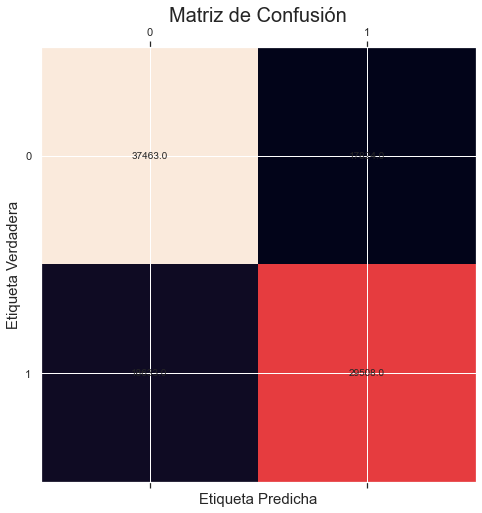

In [19]:
# Se evalúa. Matriz de Confusión

from sklearn.metrics import confusion_matrix, classification_report
cm = confusion_matrix(y_test, y_pred)

fig, ax = plt.subplots(figsize=(12,8))
ax.matshow(cm)
plt.title('Matriz de Confusión', fontsize=20)
plt.ylabel('Etiqueta Verdadera', fontsize=15)
plt.xlabel('Etiqueta Predicha', fontsize=15)
for (i, j), z in np.ndenumerate(cm):
    ax.text(j, i, '{:0.1f}'.format(z), ha='center', va='center')

In [20]:
# Se evalúa el modelo con las métricas para la Matriz de Confusión

from sklearn import metrics as metrics

In [21]:
# Accuracy

print ('Accuracy:', metrics.accuracy_score(y_test,y_pred)) # Accuracy = 0.65

# Recall

print ('Recall:', metrics.recall_score(y_test,y_pred)) # Recall = 0.61

Accuracy: 0.6475132459295355
Recall: 0.6129494609584346


In [22]:
# Predicción con el dataset de testeo (df_test)

testeo = df_test.to_numpy()
resultado = model_LogReg.predict(testeo)

c:\Users\janic\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [23]:
# Generación del archivo .csv que contiene las predicciones del modelo

df_final = pd.DataFrame(resultado)
df_final.rename(columns={0:"pred"}, inplace = True)
df_final.to_csv("janicerico.csv",index=False)